# Image Setup

In [1]:
!wget https://images-na.ssl-images-amazon.com/images/I/91SI73USlHL._SY445_.jpg

--2019-10-17 13:38:40--  https://images-na.ssl-images-amazon.com/images/I/91SI73USlHL._SY445_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 99.86.39.236
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|99.86.39.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26903 (26K) [image/jpeg]
Saving to: ‘91SI73USlHL._SY445_.jpg.10’

91SI73USlHL._SY445_ 100%[===================>]  26.27K  --.-KB/s    in 0.003s  

2019-10-17 13:38:40 (7.73 MB/s) - ‘91SI73USlHL._SY445_.jpg.10’ saved [26903/26903]



In [2]:
ls

91SI73USlHL._SY445_.jpg     91SI73USlHL._SY445_.jpg.5
91SI73USlHL._SY445_.jpg.1   91SI73USlHL._SY445_.jpg.6
91SI73USlHL._SY445_.jpg.10  91SI73USlHL._SY445_.jpg.7
91SI73USlHL._SY445_.jpg.2   91SI73USlHL._SY445_.jpg.8
91SI73USlHL._SY445_.jpg.3   91SI73USlHL._SY445_.jpg.9
91SI73USlHL._SY445_.jpg.4   sample_data/


In [0]:
filename = '91SI73USlHL._SY445_.jpg'

In [0]:
from collections import namedtuple
from math import sqrt
import random

try:
  import Image
except ImportError:
  from PIL import Image

# Model

In [0]:
Point = namedtuple('Point', ('coords', 'n', 'ct'))
Cluster = namedtuple('Cluster', ('points', 'center', 'n'))

In [0]:
class KMeans():
  
  def get_clusters(self, points, k, min_diff):  
    clusters = [Cluster([p], p, p.n) for p in random.sample(points, k)]

    while True:
      plists = [[] for i in range(k)]

      for p in points:
        smallest_distance = float('inf')

        for i in range(k):    
          distance = self._euclidean(p, clusters[i].center)

          if distance < smallest_distance:
            smallest_distance = distance
            idx = i

        plists[idx].append(p)

      diff = 0

      for i in range(k):
        old = clusters[i]
        center = self._calculate_center(plists[i], old.n)
        new = Cluster(plists[i], center, old.n)
        clusters[i] = new
        diff = max(diff, self._euclidean(old.center, new.center))

      if diff < min_diff:
        break

    return clusters
  
  def _euclidean(self, p1, p2):
    return sqrt(sum([
      (p1.coords[i] - p2.coords[i]) ** 2 for i in range(p1.n)
    ]))
  
  def _calculate_center(self, points, n):
    vals = [0.0 for i in range(n)]
    plen = 0

    for p in points:
      plen += p.ct

      for i in range(n):
        vals[i] += (p.coords[i] * p.ct)

    return Point([(v / plen) for v in vals], n, 1)

# Test

In [0]:
def get_points(img):
  points = []
  w, h = img.size
  
  for count, color in img.getcolors(w * h):
    points.append(Point(color, 3, count))
    
  return points

In [0]:
rgb_to_hex = lambda rgb: '#%s' % ''.join(('%02x' % p for p in rgb))

In [0]:
def get_colours(filename, k=3):
  img = Image.open(filename)
  img.thumbnail((200, 200))
  
  points = get_points(img)
  
  kmeans = KMeans()
  clusters = kmeans.get_clusters(points, k, 1)
  
  rgbs = [map(int, c.center.coords) for c in clusters]
  return list(map(rgb_to_hex, rgbs))

In [0]:
colors = get_colours(filename)
test_img = Image.open(filename)
test_img.thumbnail((200, 200))

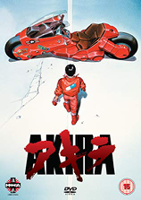

In [18]:
test_img

In [21]:
for c in colors:
  print(c)

#ecf1ee
#a6b9c5
#742a25
